### **Práctica 13: Pronóstico (Bosques aleatorios)**

Nombre: Osvaldo Ibañez Guzman

No. Cuenta: 316058672

Email: osva552920@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [149]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                # Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [151]:
GRUMAHist = pd.read_csv('GRUMAB.MX.csv')
GRUMAHist

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-29,237.410004,238.990005,232.009995,234.289993,207.512543,1463597
1,2017-11-30,235.460007,237.470001,230.110001,231.039993,204.633942,1411562
2,2017-12-01,231.039993,237.919998,231.039993,236.320007,209.310577,1426324
3,2017-12-04,233.009995,237.029999,233.009995,235.729996,208.787964,1097002
4,2017-12-05,235.729996,238.490005,235.179993,236.860001,209.788849,1191916
...,...,...,...,...,...,...,...
1252,2022-11-22,234.029999,234.449997,228.100006,228.669998,228.669998,587542
1253,2022-11-23,229.759995,239.759995,219.369995,239.130005,239.130005,1580655
1254,2022-11-24,237.509995,241.610001,237.509995,241.589996,241.589996,73583
1255,2022-11-25,240.979996,240.979996,232.949997,234.000000,234.000000,209348


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* El 'Adj Close' Precio tomando en cuenta cualquier cosa que pueda afectar después del cierre

In [152]:
GRUMAHist=GRUMAHist.set_index('Date')
GRUMAHist

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-29,237.410004,238.990005,232.009995,234.289993,207.512543,1463597
2017-11-30,235.460007,237.470001,230.110001,231.039993,204.633942,1411562
2017-12-01,231.039993,237.919998,231.039993,236.320007,209.310577,1426324
2017-12-04,233.009995,237.029999,233.009995,235.729996,208.787964,1097002
2017-12-05,235.729996,238.490005,235.179993,236.860001,209.788849,1191916
...,...,...,...,...,...,...
2022-11-22,234.029999,234.449997,228.100006,228.669998,228.669998,587542
2022-11-23,229.759995,239.759995,219.369995,239.130005,239.130005,1580655
2022-11-24,237.509995,241.610001,237.509995,241.589996,241.589996,73583


### **Descripción de la estructura de los datos**

In [153]:
GRUMAHist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 2017-11-29 to 2022-11-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1257 non-null   float64
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Adj Close  1257 non-null   float64
 5   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7+ KB


In [154]:
GRUMAHist.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,225.232864,228.207073,222.191965,225.223051,211.386217,8.022729e+05
std,22.767481,23.164466,22.355771,22.750871,24.833703,5.614090e+05
min,164.839996,170.080002,150.809998,166.070007,152.284058,0.000000e+00
25%,209.669998,212.660004,207.110001,208.940002,193.809875,4.467430e+05
50%,227.139999,230.149994,224.020004,226.979996,212.782990,6.509230e+05
75%,240.020004,243.000000,237.630005,240.119995,228.242767,1.013598e+06
max,283.859985,290.269989,276.399994,282.959991,274.924225,5.045875e+06


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

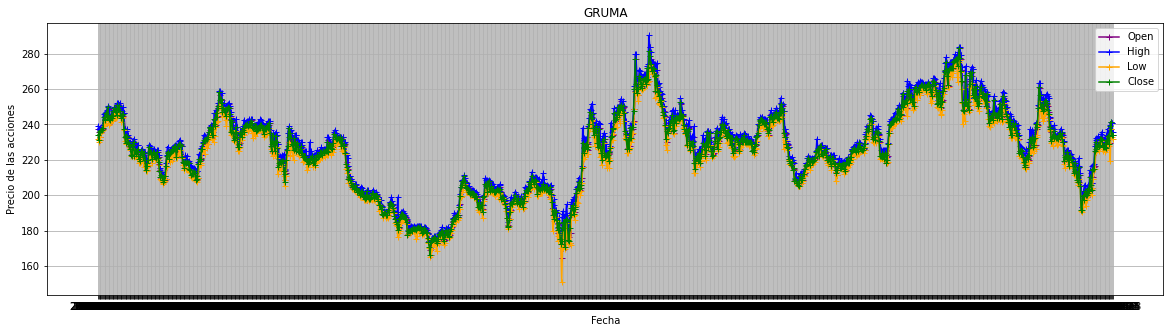

In [155]:
plt.figure(figsize=(20, 5))
plt.plot(GRUMAHist['Open'], color='purple', marker='+', label='Open')
plt.plot(GRUMAHist['High'], color='blue', marker='+', label='High')
plt.plot(GRUMAHist['Low'], color='orange', marker='+', label='Low')
plt.plot(GRUMAHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('GRUMA')
plt.grid(True)
plt.legend()
plt.show()

In [156]:
MDatos = GRUMAHist.drop(columns = ['Volume', 'Adj Close'])
MDatos

,Open,High,Low,Close
Date,,,,
2017-11-29,237.410004,238.990005,232.009995,234.289993
2017-11-30,235.460007,237.470001,230.110001,231.039993
2017-12-01,231.039993,237.919998,231.039993,236.320007
2017-12-04,233.009995,237.029999,233.009995,235.729996
2017-12-05,235.729996,238.490005,235.179993,236.860001
...,...,...,...,...
2022-11-22,234.029999,234.449997,228.100006,228.669998
2022-11-23,229.759995,239.759995,219.369995,239.130005
2022-11-24,237.509995,241.610001,237.509995,241.589996


In [157]:
MDatosVol = GRUMAHist.drop(columns = ['Adj Close'])
MDatosVol

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-29,237.410004,238.990005,232.009995,234.289993,1463597
2017-11-30,235.460007,237.470001,230.110001,231.039993,1411562
2017-12-01,231.039993,237.919998,231.039993,236.320007,1426324
2017-12-04,233.009995,237.029999,233.009995,235.729996,1097002
2017-12-05,235.729996,238.490005,235.179993,236.860001,1191916
...,...,...,...,...,...
2022-11-22,234.029999,234.449997,228.100006,228.669998,587542
2022-11-23,229.759995,239.759995,219.369995,239.130005,1580655
2022-11-24,237.509995,241.610001,237.509995,241.589996,73583


### ARBOLES DE DECISIÓN

In [191]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [192]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,237.410004,238.990005,232.009995
1,235.460007,237.470001,230.110001
2,231.039993,237.919998,231.039993
3,233.009995,237.029999,233.009995
4,235.729996,238.490005,235.179993
...,...,...,...
1252,234.029999,234.449997,228.100006
1253,229.759995,239.759995,219.369995
1254,237.509995,241.610001,237.509995
1255,240.979996,240.979996,232.949997


In [193]:
XVol = np.array(MDatosVol[['Open',
                     'High',
                     'Low',
                     'Volume']])
pd.DataFrame(X)

,0,1,2
0,237.410004,238.990005,232.009995
1,235.460007,237.470001,230.110001
2,231.039993,237.919998,231.039993
3,233.009995,237.029999,233.009995
4,235.729996,238.490005,235.179993
...,...,...,...
1252,234.029999,234.449997,228.100006
1253,229.759995,239.759995,219.369995
1254,237.509995,241.610001,237.509995
1255,240.979996,240.979996,232.949997


In [194]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,234.289993
1,231.039993
2,236.320007
3,235.729996
4,236.860001
...,...
1252,228.669998
1253,239.130005
1254,241.589996
1255,234.000000


Se hace la división de los datos

In [195]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [196]:
XVol_train, XVol_test, YVol_train, YVol_test = model_selection.train_test_split(XVol, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

Se entrena el modelo

In [197]:
PronosticoAD = DecisionTreeRegressor(max_depth=14, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2,
                                         random_state=0)
PronosticoAD.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=2, min_samples_split=4,
                      random_state=0)

In [198]:
PronosticoADVol = DecisionTreeRegressor(max_depth=14, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2,
                                         random_state=0)
PronosticoADVol.fit(XVol_train, YVol_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=2, min_samples_split=4,
                      random_state=0)

In [250]:
Y_Pronostico = PronosticoAD.predict(X_test)
YVol_Pronostico = PronosticoADVol.predict(XVol_test)

In [251]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
ValoresVol=pd.DataFrame(YVol_test, YVol_Pronostico)

In [202]:
print('Sin Volumen')
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))


Sin Volumen
Criterio: 
 squared_error
Importancia variables: 
 [0.00195707 0.09396903 0.90407391]
MAE: 1.6602
MSE: 5.5205
RMSE: 2.3496
Score: 0.9897


In [203]:
print('Con Volumen')
print('Criterio: \n', PronosticoADVol.criterion)
print('Importancia variables: \n', PronosticoADVol.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(YVol_test, YVol_Pronostico))
print("MSE: %.4f" % mean_squared_error(YVol_test, YVol_Pronostico))
print("RMSE: %.4f" % mean_squared_error(YVol_test, YVol_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(YVol_test, YVol_Pronostico))


Con Volumen
Criterio: 
 squared_error
Importancia variables: 
 [1.79824628e-03 9.39717972e-02 9.03398827e-01 8.31129130e-04]
MAE: 1.7523
MSE: 5.9454
RMSE: 2.4383
Score: 0.9889


#### **Conformación del modelo de pronóstico**

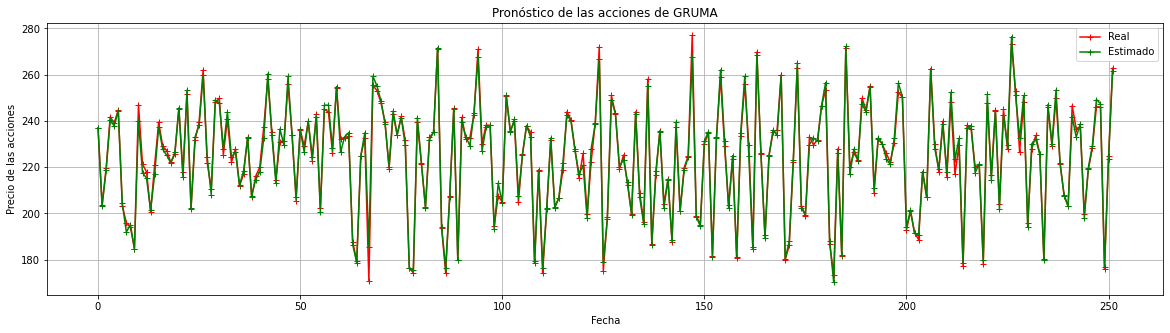

In [204]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de GRUMA')
plt.grid(True)
plt.legend()
plt.show()

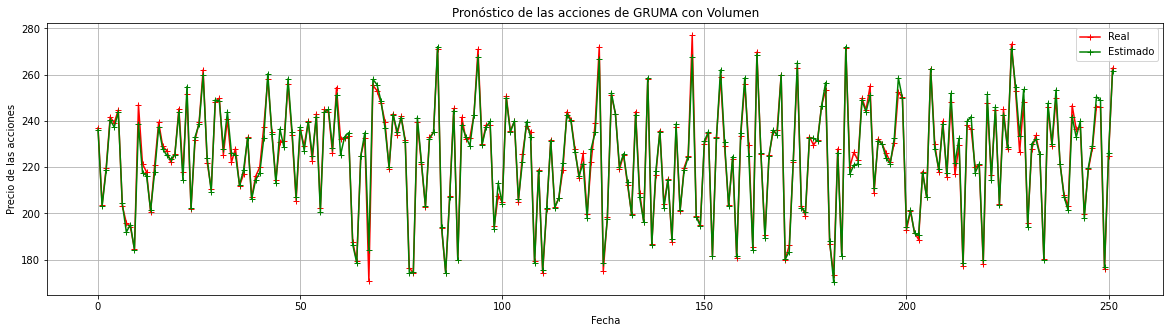

In [205]:
plt.figure(figsize=(20, 5))
plt.plot(YVol_test, color='red', marker='+', label='Real')
plt.plot(YVol_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de GRUMA con Volumen')
plt.grid(True)
plt.legend()
plt.show()

In [206]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
2,Low,0.904074
1,High,0.093969
0,Open,0.001957


In [207]:
ImportanciaVol = pd.DataFrame({'Variable': list(MDatosVol[['Open', 'High', 'Low','Volume']]),
                            'Importancia': PronosticoADVol.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaVol

,Variable,Importancia
2,Low,0.903399
1,High,0.093972
0,Open,0.001798
3,Volume,0.000831


#### **Conformación del árbol**

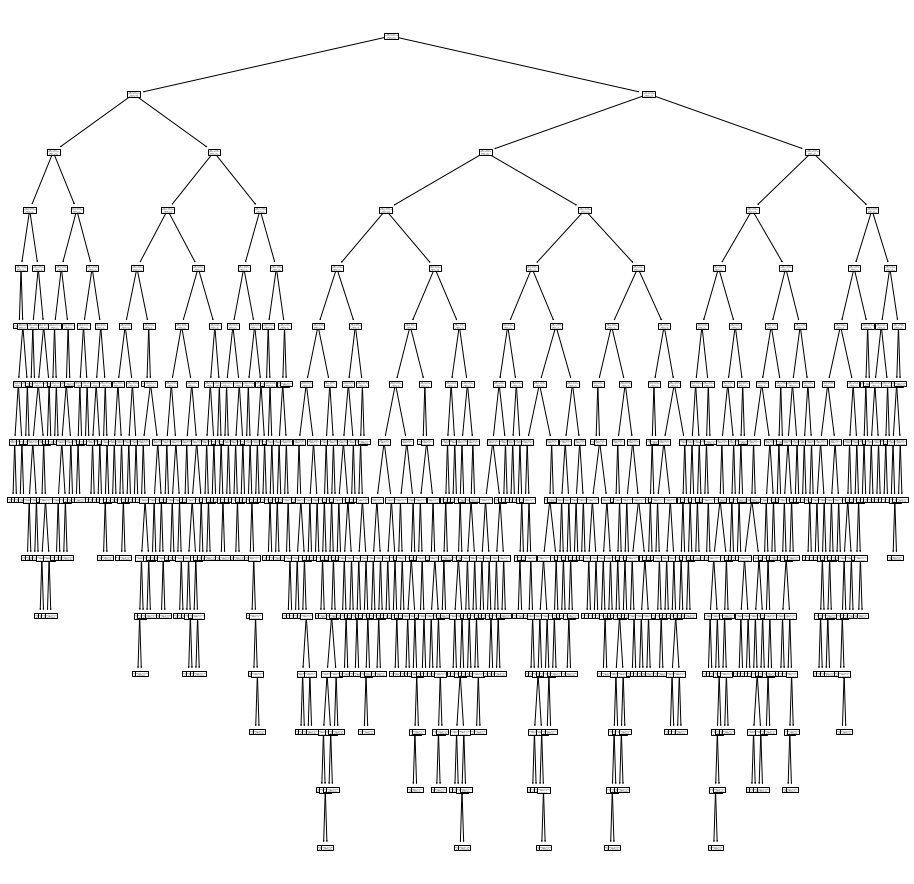

In [208]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(PronosticoAD, 
          feature_names = ['Open', 'High', 'Low'])
plt.show()

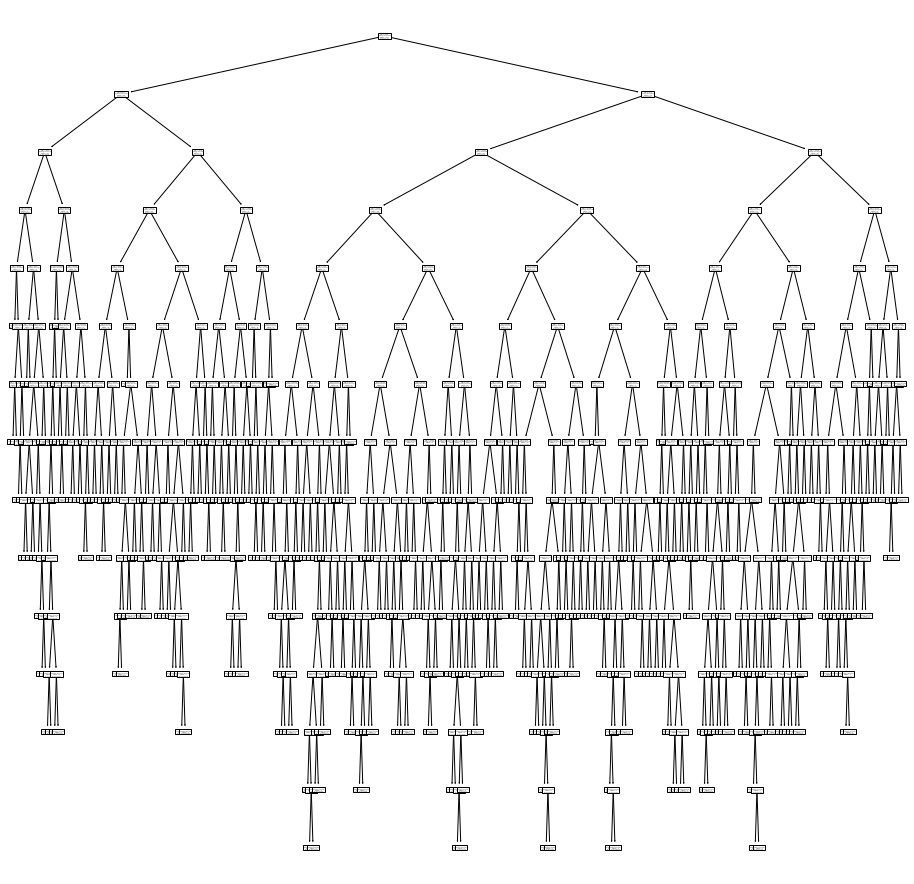

In [209]:
plt.figure(figsize=(16,16))  
plot_tree(PronosticoADVol, 
          feature_names = ['Open', 'High', 'Low','Volume'])
plt.show()

In [210]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, 
                      feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- Low <= 213.58
|   |--- Low <= 191.77
|   |   |--- High <= 185.50
|   |   |   |--- Low <= 175.15
|   |   |   |   |--- High <= 174.88
|   |   |   |   |   |--- value: [170.14]
|   |   |   |   |--- High >  174.88
|   |   |   |   |   |--- Low <= 173.08
|   |   |   |   |   |   |--- Open <= 175.62
|   |   |   |   |   |   |   |--- High <= 175.98
|   |   |   |   |   |   |   |   |--- value: [174.68]
|   |   |   |   |   |   |   |--- High >  175.98
|   |   |   |   |   |   |   |   |--- value: [176.54]
|   |   |   |   |   |   |--- Open >  175.62
|   |   |   |   |   |   |   |--- Low <= 172.71
|   |   |   |   |   |   |   |   |--- value: [173.33]
|   |   |   |   |   |   |   |--- Low >  172.71
|   |   |   |   |   |   |   |   |--- value: [174.16]
|   |   |   |   |   |--- Low >  173.08
|   |   |   |   |   |   |--- High <= 177.82
|   |   |   |   |   |   |   |--- value: [175.49]
|   |   |   |   |   |   |--- High >  177.82
|   |   |   |   |   |   |   |--- value: [178.79]
|   |   |   |--- Low >  175.15
|

In [211]:
from sklearn.tree import export_text
ReporteVol = export_text(PronosticoADVol, 
                      feature_names = ['Open', 'High', 'Low','Volume'])
print(ReporteVol)

|--- Low <= 213.58
|   |--- Low <= 191.77
|   |   |--- High <= 185.50
|   |   |   |--- Low <= 175.15
|   |   |   |   |--- High <= 174.88
|   |   |   |   |   |--- value: [170.14]
|   |   |   |   |--- High >  174.88
|   |   |   |   |   |--- Volume <= 900761.00
|   |   |   |   |   |   |--- High <= 178.36
|   |   |   |   |   |   |   |--- value: [174.40]
|   |   |   |   |   |   |--- High >  178.36
|   |   |   |   |   |   |   |--- value: [178.54]
|   |   |   |   |   |--- Volume >  900761.00
|   |   |   |   |   |   |--- Open <= 176.21
|   |   |   |   |   |   |   |--- High <= 176.23
|   |   |   |   |   |   |   |   |--- value: [174.68]
|   |   |   |   |   |   |   |--- High >  176.23
|   |   |   |   |   |   |   |   |--- value: [175.49]
|   |   |   |   |   |   |--- Open >  176.21
|   |   |   |   |   |   |   |--- value: [173.74]
|   |   |   |--- Low >  175.15
|   |   |   |   |--- High <= 180.47
|   |   |   |   |   |--- High <= 179.34
|   |   |   |   |   |   |--- value: [176.91]
|   |   |   |   |  

### BOSQUES ALEATORIOS

In [212]:
from sklearn.ensemble import RandomForestRegressor

In [213]:
PronosticoBA = RandomForestRegressor(n_estimators=100,
                                         max_depth=8, 
                                         min_samples_split=8, 
                                         min_samples_leaf=2, 
                                         random_state=0)

PronosticoBA.fit(X_train, Y_train)


C:\Users\osva_\AppData\Local\Temp\ipykernel_9984\3125920614.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBA.fit(X_train, Y_train)


RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                      random_state=0)

In [214]:
PronosticoBAVol = RandomForestRegressor(n_estimators=100,
                                         max_depth=7, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2, 
                                         random_state=1234)

PronosticoBAVol.fit(XVol_train, YVol_train)

C:\Users\osva_\AppData\Local\Temp\ipykernel_9984\1984403742.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBAVol.fit(XVol_train, YVol_train)


RandomForestRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=4,
                      random_state=1234)

In [215]:
Y_PronosticoBA = PronosticoBA.predict(X_test)
YVol_PronosticoBA = PronosticoBAVol.predict(XVol_test)

In [252]:
ValoresBosque = pd.DataFrame(Y_test, Y_PronosticoBA)
ValoresBosqueVol = pd.DataFrame(YVol_test, YVol_PronosticoBA)

In [218]:
ImportanciaBosques = pd.DataFrame({'Variable': list(MDatos[['Open',
                                                        'High',
                                                        'Low']]), 
                             'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaBosques

,Variable,Importancia
2,Low,0.659283
1,High,0.338558
0,Open,0.002159


In [219]:
ImportanciaBosquesVol = pd.DataFrame({'Variable': list(MDatosVol[['Open',
                                                        'High',
                                                        'Low',
                                                        'Volume']]), 
                             'Importancia': PronosticoBAVol.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaBosquesVol

,Variable,Importancia
2,Low,0.708103
1,High,0.289076
0,Open,0.002252
3,Volume,0.000569


### VALIDACIÓN

In [239]:
print("SCORE : ")
print("Árbol de decisión:", r2_score(Y_test, Y_Pronostico))
print("Bosque aleatorio:", r2_score(Y_test, Y_PronosticoBA))
print("")
print("Árbol de decisión con Volumen:", r2_score(YVol_test, YVol_Pronostico))
print("Bosque aleatorio con Volumen:", r2_score(YVol_test, YVol_PronosticoBA))

SCORE : 
Árbol de decisión: 0.9897144026133515
Bosque aleatorio: 0.992961682161599

Árbol de decisión con Volumen: 0.9889228493211426
Bosque aleatorio con Volumen: 0.9924559289851526


### NUEVOS PRONOSTICOS

In [245]:
# ARBOLES DE DECISION
# Close : 231.039993
PrecioAccion = pd.DataFrame({'Open': [235.460007],
                             'High': [237.470001], 
                             'Low': [230.110001]})
print("Pronostico Arbol de Decisión sin Volumen",PronosticoAD.predict(PrecioAccion))
print("Pronostico Arbol de Decisión con Volumen",PronosticoBA.predict(PrecioAccion))

Pronostico Arbol de Decisión sin Volumen [236.5250015]
Pronostico Arbol de Decisión con Volumen [233.17786638]


D:\Users\osva_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
D:\Users\osva_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [249]:
# ARBOLES DE DECISION CON VOLUMEN
# Close: 231.039993
PrecioAccionVol = pd.DataFrame({'Open': [235.460007],
                             'High': [237.470001], 
                             'Low': [230.110001],
                             'Volume': [1411562]})
print("Pronostico Bosques Aleatorios sin Volumen",PronosticoADVol.predict(PrecioAccionVol))
print("Pronostico Bosques Aleatorios con Volumen",PronosticoBAVol.predict(PrecioAccionVol))

Pronostico Bosques Aleatorios sin Volumen [236.5250015]
Pronostico Bosques Aleatorios con Volumen [233.27447942]


D:\Users\osva_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
D:\Users\osva_\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
